In [118]:
import matplotlib.pyplot as plt
import numpy as np
import math
from keras.optimizers.schedules import ExponentialDecay

# Manual decaying + oscillating learning rate (simulated annealing ish)

In [113]:
epochs=20
T=int(np.ceil(epochs/4)) #Period: e.g. 1/2 or 1/4 of number of epochs
T

5

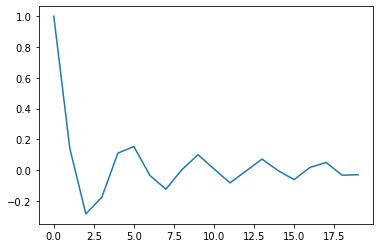

In [114]:
#start at local max
#incresing frequency
#decreasing amplitude
#converges to 0
sinValsIncreasFreq= np.array([ 1/(i+1) * np.sin(2*math.pi*(i+T/4)/(T*math.exp(-0.01*i))) for i in range(4*T) ])
plt.plot(sinValsIncreasFreq)

In [115]:
#Convex combo of lowest and highest lr
minSin=np.min(sinValsIncreasFreq)
maxSin=np.max(sinValsIncreasFreq)
rangeSin=(maxSin-minSin)
lrInit=10**-2
lrMin=10**-4
sinValsAdjusted= lrInit*(sinValsIncreasFreq-minSin)/rangeSin + lrMin * (1-((sinValsIncreasFreq-minSin)/rangeSin)) 

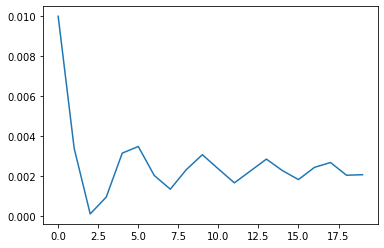

In [116]:
plt.plot(sinValsAdjusted)

In [117]:
np.max(sinValsAdjusted), np.min(sinValsAdjusted)

(0.01, 0.0001)

# Benchmark against out of the box exponential decay

## Exponentially increasing

In [129]:
lr_schedule = ExponentialDecay(
            10**-2,
            decay_steps=len(sinValsAdjusted),
            decay_rate=1.9,
            staircase=False)

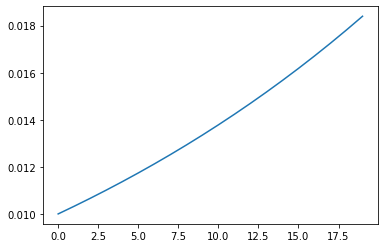

In [130]:
lrValues = [ lr_schedule(step=i).numpy() for i in range(len(sinValsAdjusted)) ]
plt.plot(lrValues)

## Exponentially decreasing

In [132]:
lr_schedule = ExponentialDecay(
            10**-2,
            decay_steps=len(sinValsAdjusted),
            decay_rate=0.5,
            staircase=False)

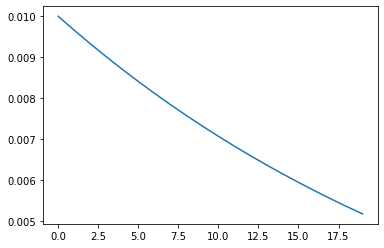

In [133]:
lrValues = [ lr_schedule(step=i).numpy() for i in range(len(sinValsAdjusted)) ]
plt.plot(lrValues)